In [1]:
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.ensemble import *

In [2]:
X = pd.read_csv('edited_train.csv')
y = X['TripType']
X = X.drop('TripType', axis=1)

In [3]:
forest = RandomForestClassifier(max_depth=5, n_estimators=200)
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [5]:
cross_val_score(forest, X, y, scoring="accuracy", cv=5).mean()

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.4575068824866822

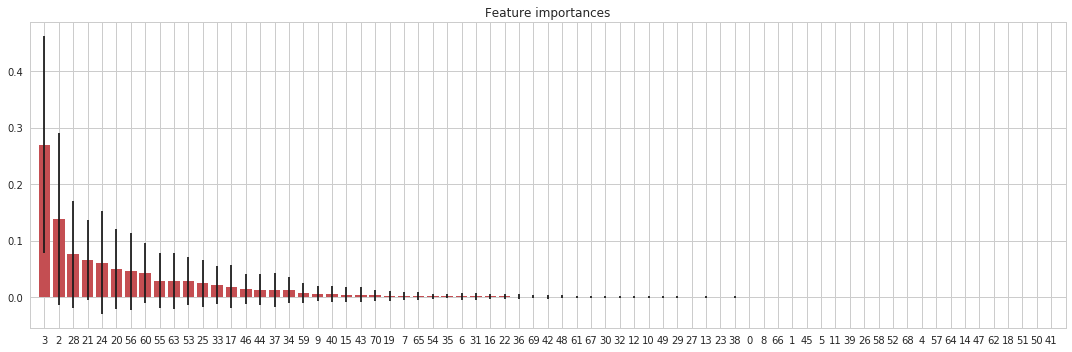

In [6]:
f=plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [7]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 3 (0.269783)
2. feature 2 (0.137972)
3. feature 28 (0.075710)
4. feature 21 (0.065709)
5. feature 24 (0.061073)
6. feature 20 (0.049550)
7. feature 56 (0.045409)
8. feature 60 (0.042849)
9. feature 55 (0.029169)
10. feature 63 (0.029101)
11. feature 53 (0.028756)
12. feature 25 (0.024007)
13. feature 33 (0.021172)
14. feature 17 (0.018390)
15. feature 46 (0.014515)
16. feature 44 (0.012863)
17. feature 37 (0.012818)
18. feature 34 (0.012206)
19. feature 59 (0.007480)
20. feature 9 (0.005944)
21. feature 40 (0.005649)
22. feature 15 (0.004421)
23. feature 43 (0.004094)
24. feature 70 (0.003179)
25. feature 19 (0.001939)
26. feature 7 (0.001821)
27. feature 65 (0.001687)
28. feature 54 (0.001502)
29. feature 35 (0.001499)
30. feature 6 (0.001290)
31. feature 31 (0.001227)
32. feature 16 (0.001089)
33. feature 22 (0.001074)
34. feature 36 (0.000859)
35. feature 69 (0.000526)
36. feature 42 (0.000496)
37. feature 48 (0.000475)
38. feature 61 (0.000402)
39. featu